<a href="https://colab.research.google.com/github/alfianhid/Digital-Image-Conversion-to-Histogram-with-Python/blob/main/Digital_Image_Conversion_to_Histogram_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pertama, kita upload gambar kita supaya bisa terbaca di Google Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pikachu.jpg to pikachu.jpg


**Setelah gambar diupload ke Google Colab, kemudian import library yang dibutuhkan**

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd

**Kedua, kita baca dulu file yang telah kita upload tadi dan menampilkannya di Google Colab**

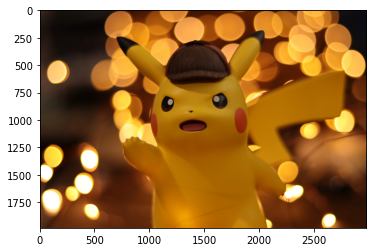

In [ ]:
img = Image.open("pikachu.jpg")
plt.imshow(img) # menampilkan gambar RGB dengan resolusi asli (Full HD)

**Ketiga, kita coba menampilkan gambarnya dengan versi Grayscale**

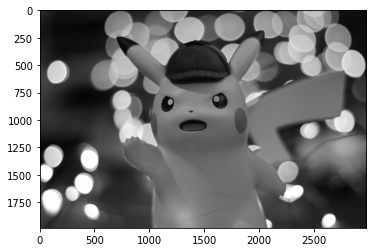

In [ ]:
img_gray = Image.open("pikachu.jpg").convert("LA") # ada 14 parameter yang bisa digunakan, LA artinya Luminosity (Terang) with Alpha (Gelap)
plt.imshow(img_gray) # menampilkan gambar Grayscale dengan resolusi asli (Full HD)

**Keempat, kita lakukan pixelation terhadap gambar yang telah kita konversi**

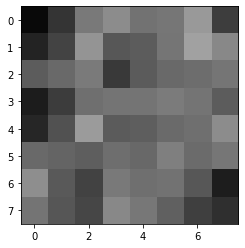

In [ ]:
img_gray = Image.open("pikachu.jpg").convert("LA")
img_gray_pixelated = img_gray.resize((8,8)) # meresize gambar Full HD menjadi gambar dengan resolusi 32 x 32 pixel
plt.imshow(img_gray_pixelated) # menampilkan gambar Grayscale dengan resolusi 32 x 32 pixel

**Kelima, kita lihat pixel value dalam bentuk array pada gambar yang telah kita lakukan proses pixelation**

In [ ]:
img_px_value = np.asarray(img_gray_pixelated) # mengkonversi gambar Grayscale menjadi pixel value dalam bentuk array
print(img_px_value)

[[[  9 255]
  [ 52 255]
  [121 255]
  [140 255]
  [114 255]
  [118 255]
  [153 255]
  [ 61 255]]

 [[ 35 255]
  [ 67 255]
  [148 255]
  [ 87 255]
  [ 92 255]
  [117 255]
  [161 255]
  [136 255]]

 [[ 92 255]
  [105 255]
  [122 255]
  [ 57 255]
  [ 91 255]
  [105 255]
  [109 255]
  [117 255]]

 [[ 28 255]
  [ 60 255]
  [111 255]
  [116 255]
  [116 255]
  [123 255]
  [116 255]
  [ 92 255]]

 [[ 38 255]
  [ 81 255]
  [155 255]
  [ 91 255]
  [ 94 255]
  [106 255]
  [111 255]
  [140 255]]

 [[105 255]
  [100 255]
  [ 94 255]
  [110 255]
  [104 255]
  [127 255]
  [107 255]
  [118 255]]

 [[142 255]
  [ 89 255]
  [ 66 255]
  [121 255]
  [111 255]
  [114 255]
  [ 87 255]
  [ 29 255]]

 [[116 255]
  [ 86 255]
  [ 70 255]
  [136 255]
  [119 255]
  [ 96 255]
  [ 63 255]
  [ 47 255]]]


**Keenam, kita lakukan konversi dari array tadi menjadi dataset yang lebih mudah dibaca**

In [ ]:
df = pd.DataFrame(np.concatenate(img_px_value),columns=["Pixel value","Max value"])
print(df)

    Pixel value  Max value
0             9        255
1            52        255
2           121        255
3           140        255
4           114        255
..          ...        ...
59          136        255
60          119        255
61           96        255
62           63        255
63           47        255

[64 rows x 2 columns]


**Ketujuh, kita lakukan konversi dari gambar Grayscale kita di awal menjadi Histogram**

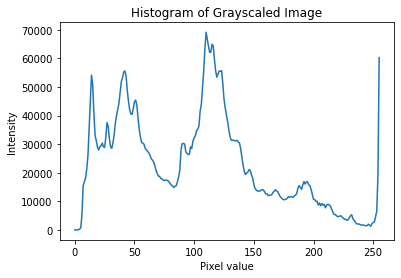

In [ ]:
img = cv2.imread("pikachu.jpg")
image_conv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(img_gray_hist)
plt.title('Histogram of Grayscaled Image')
plt.xlabel('Pixel value')
plt.ylabel('Intensity')
plt.show()

**Kedelapan, kita lakukan konversi dari gambar RGB/berwarna ke dalam bentuk Histogram**

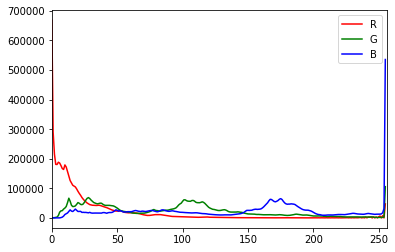

In [ ]:
r_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([img], [1], None, [256], [0, 256])
b_hist = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.plot(r_hist, label='R', color='red')
plt.plot(g_hist, label='G', color='green')
plt.plot(b_hist, label='B', color='blue')

plt.legend(loc='best')
plt.xlim([0, 256])
plt.show()